# Bank Customer Churn: Exploratory Data Analysis

This notebook focuses on exploring and understanding the bank customer data before model development.

## Contents:
1. Data Loading and Initial Analysis
2. Feature Distribution Analysis
3. Correlation Analysis
4. Pattern Discovery
5. Feature Engineering Insights

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use('seaborn')
#sns.set_palette('husl')

## 1. Data Loading and Initial Analysis

In [4]:
# Load the data
df = pd.read_csv('../data/BankChurners.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (10127, 23)

Columns: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

Data Types:
 CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                               

## 2. Feature Distribution Analysis

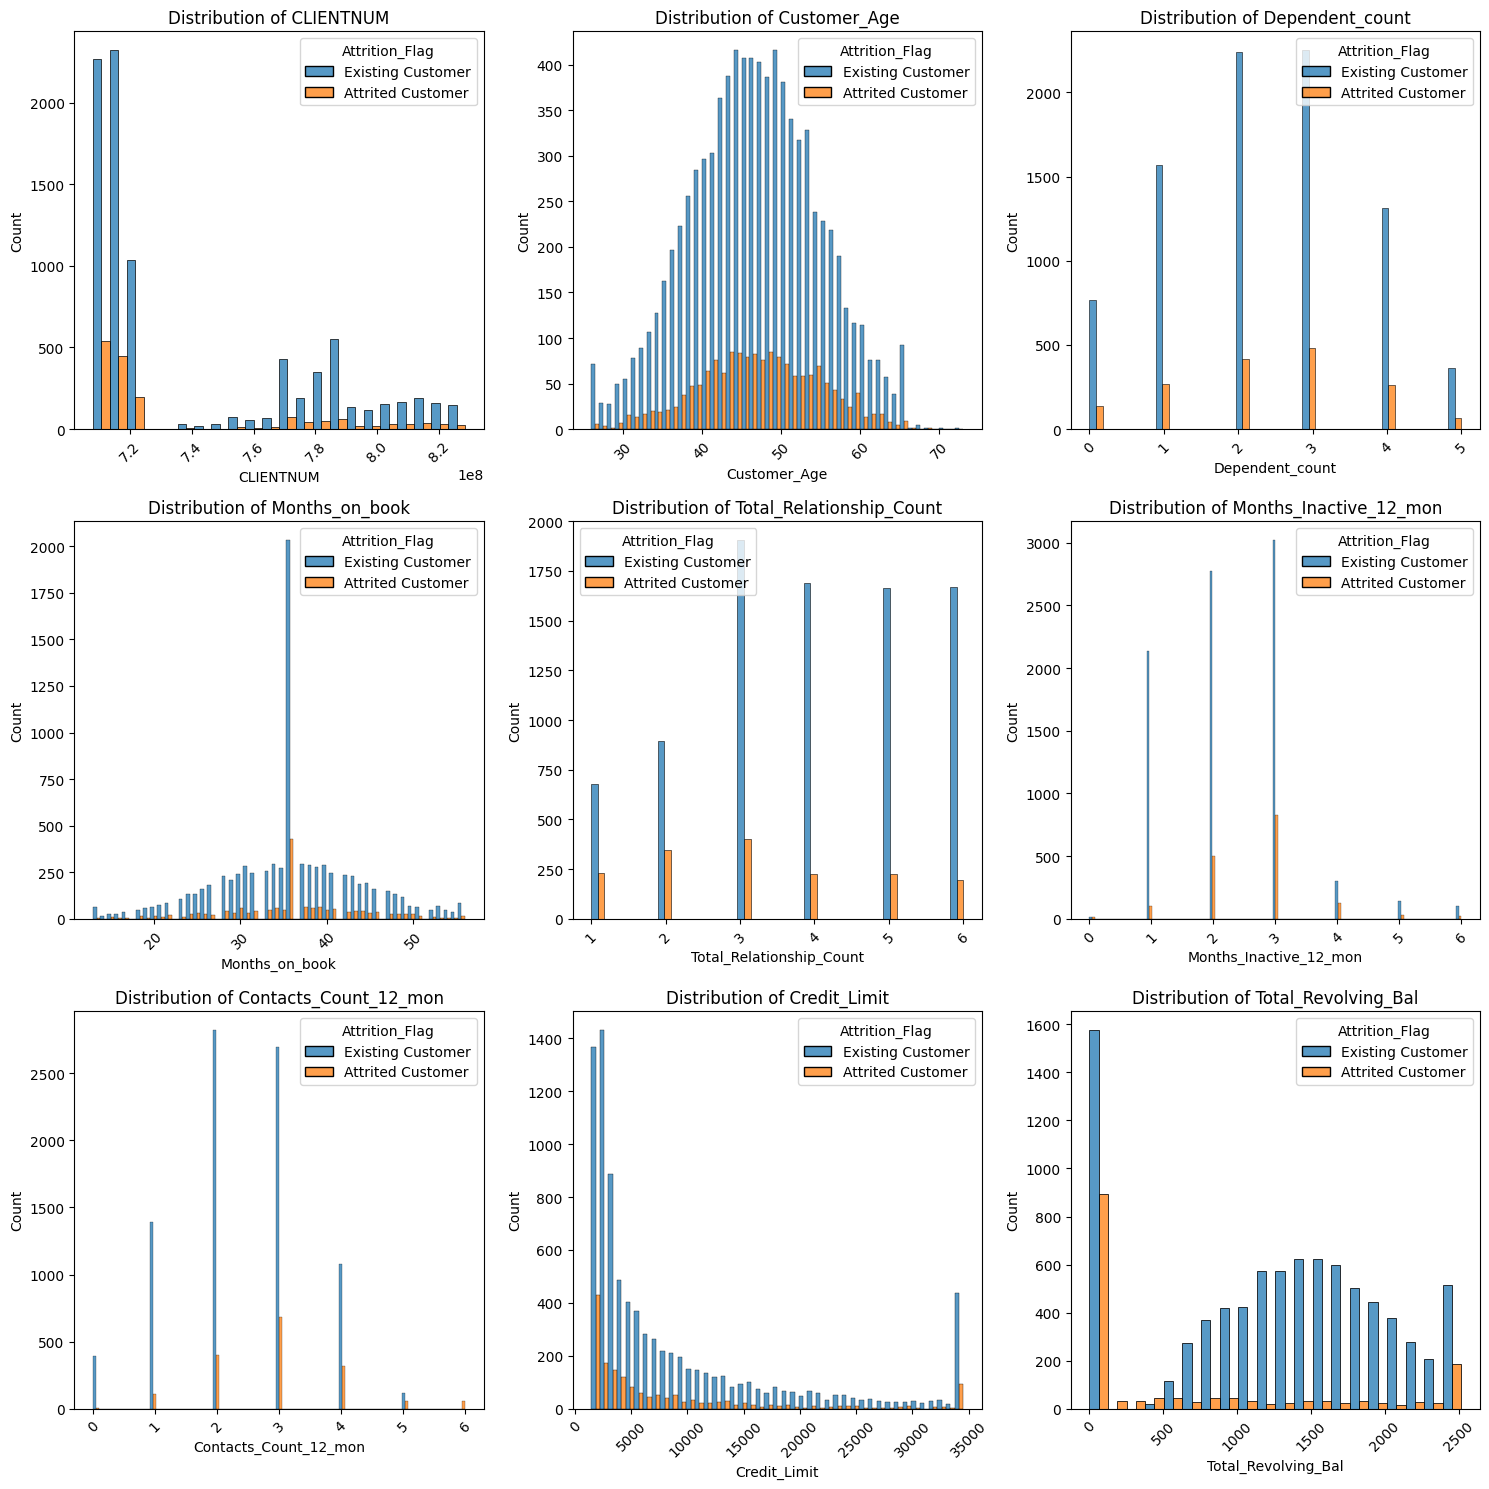

In [5]:
# Numerical Features Distribution
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:9]):
    sns.histplot(data=df, x=col, hue='Attrition_Flag', multiple="dodge", ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Correlation Analysis

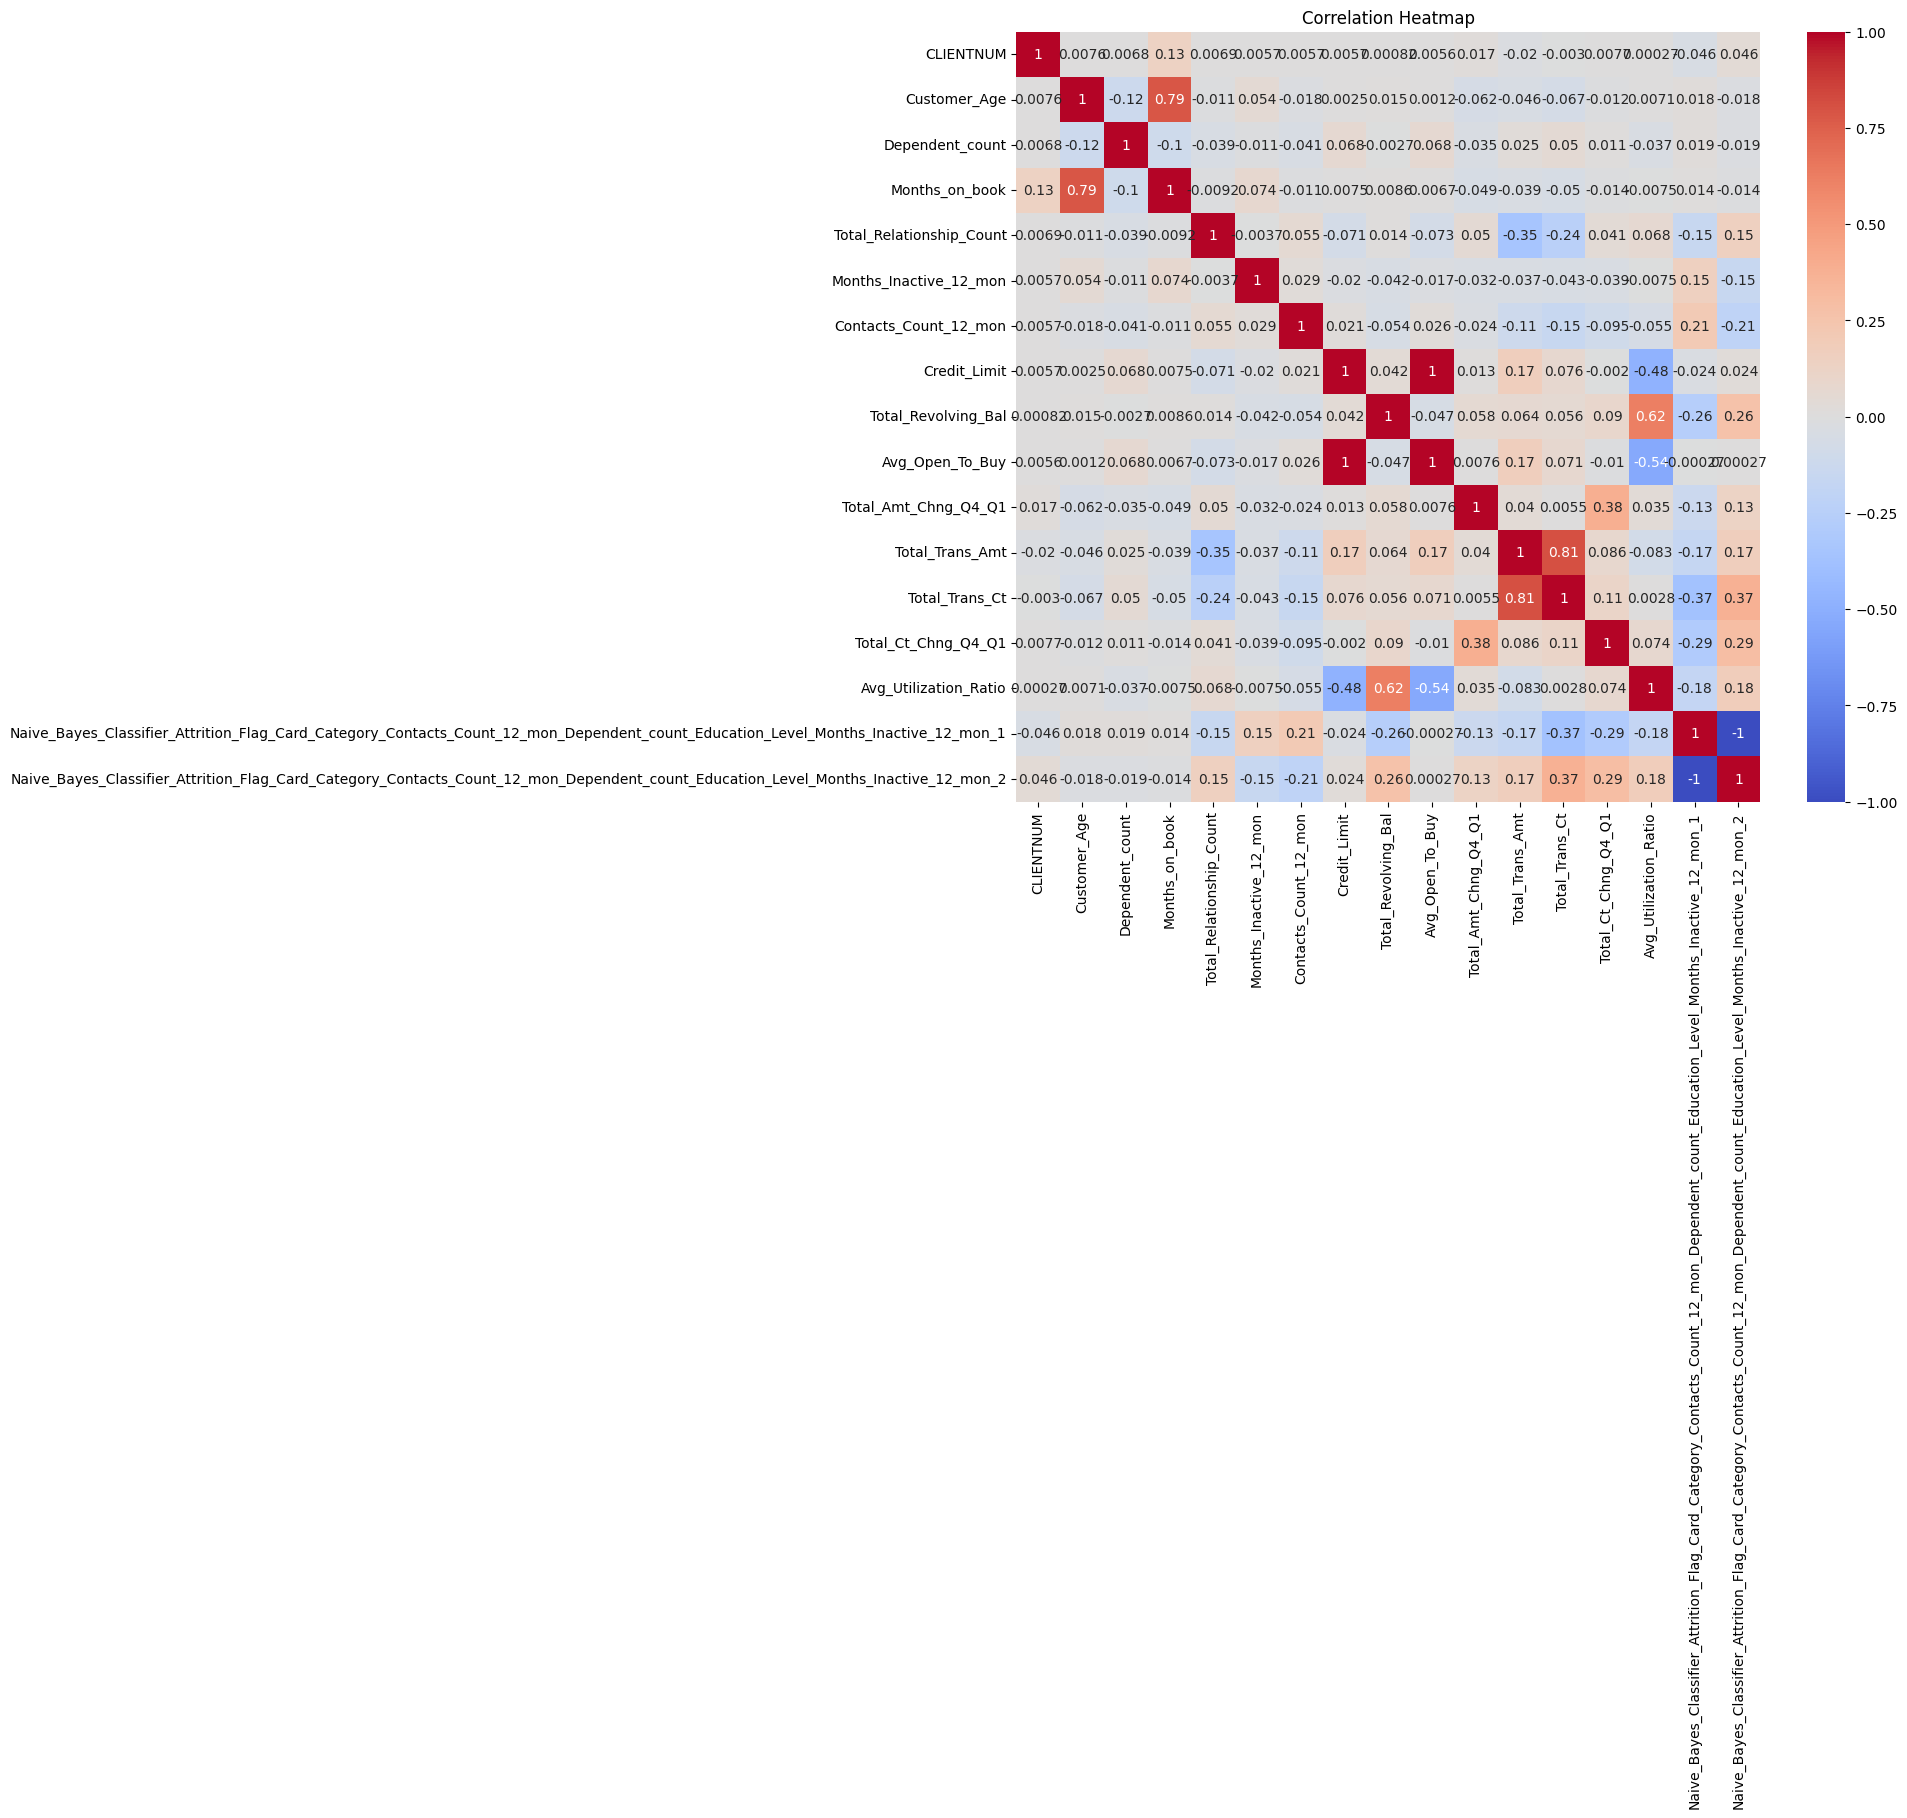

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 4. Pattern Discovery

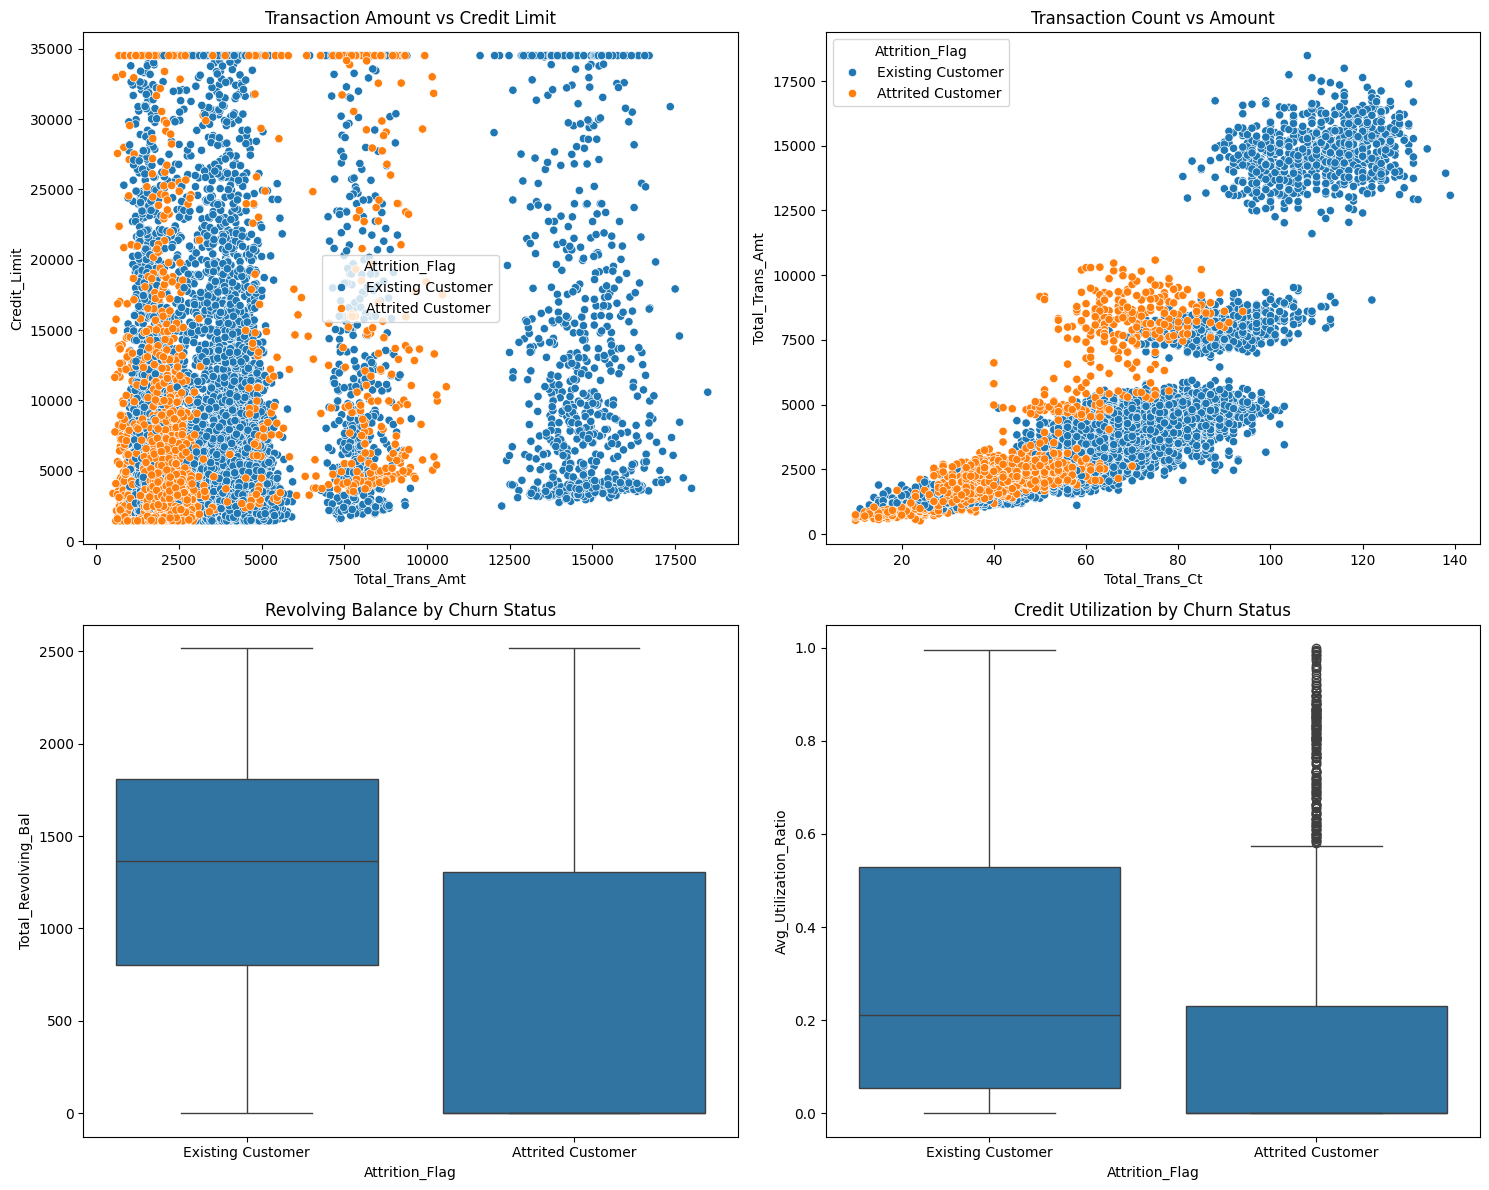

In [7]:
# Transaction Patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Transaction Amount vs Credit Limit
sns.scatterplot(data=df, x='Total_Trans_Amt', y='Credit_Limit', 
                hue='Attrition_Flag', ax=axes[0,0])
axes[0,0].set_title('Transaction Amount vs Credit Limit')

# Transaction Count vs Amount
sns.scatterplot(data=df, x='Total_Trans_Ct', y='Total_Trans_Amt', 
                hue='Attrition_Flag', ax=axes[0,1])
axes[0,1].set_title('Transaction Count vs Amount')

# Revolving Balance Distribution
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Revolving_Bal', ax=axes[1,0])
axes[1,0].set_title('Revolving Balance by Churn Status')

# Credit Utilization
sns.boxplot(data=df, x='Attrition_Flag', y='Avg_Utilization_Ratio', ax=axes[1,1])
axes[1,1].set_title('Credit Utilization by Churn Status')

plt.tight_layout()
plt.show()

## 5. Feature Engineering Insights

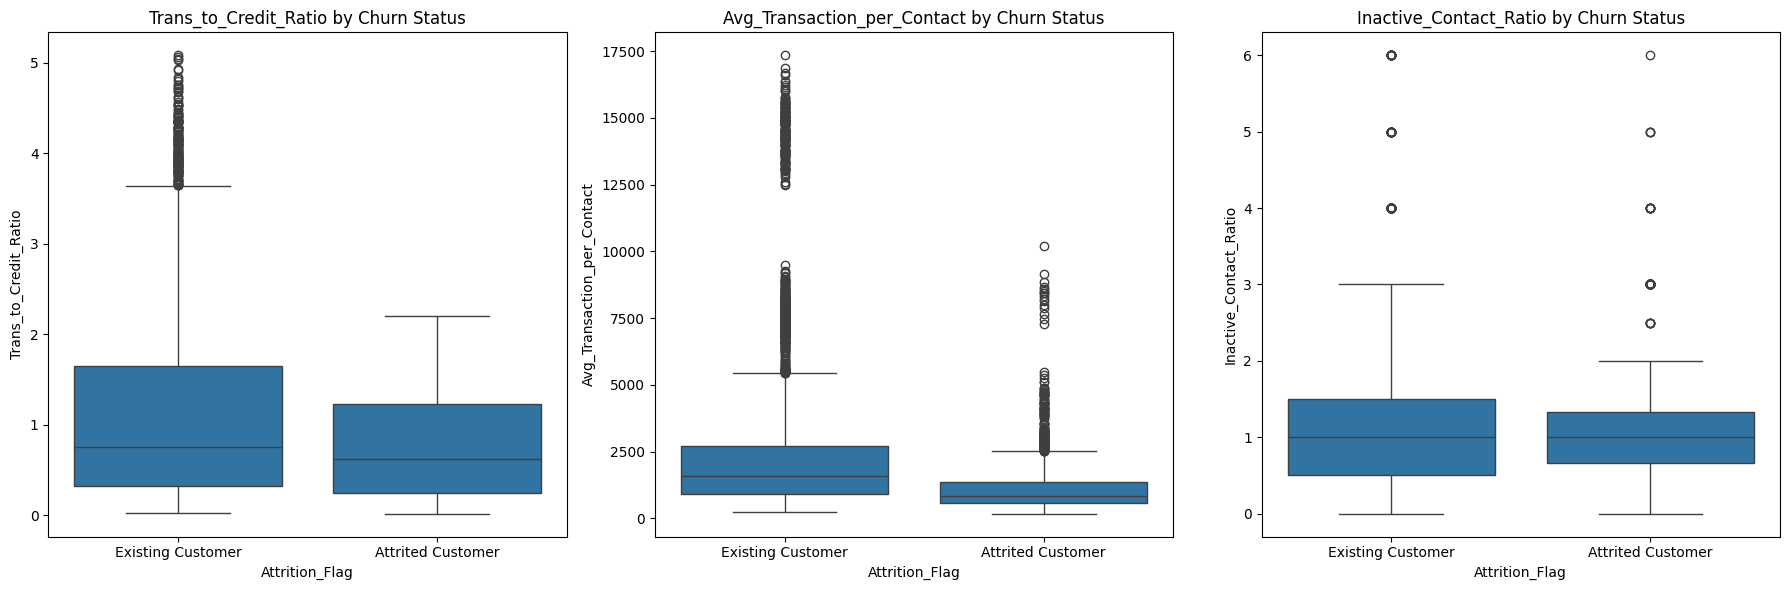

In [8]:
# Create derived features
df['Trans_to_Credit_Ratio'] = df['Total_Trans_Amt'] / df['Credit_Limit']
df['Avg_Transaction_per_Contact'] = df['Total_Trans_Amt'] / df['Contacts_Count_12_mon']
df['Inactive_Contact_Ratio'] = df['Months_Inactive_12_mon'] / df['Contacts_Count_12_mon']

# Visualize derived features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, col in enumerate(['Trans_to_Credit_Ratio', 'Avg_Transaction_per_Contact', 'Inactive_Contact_Ratio']):
    sns.boxplot(data=df, x='Attrition_Flag', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn Status')

plt.tight_layout()
plt.show()

## Summary of Findings

### Key Insights:
1. Transaction patterns show clear differences between churned and non-churned customers
2. Credit utilization is a strong indicator of churn risk
3. Derived features show promising separation between classes

### Recommendations for Feature Engineering:
1. Create ratio-based features
2. Transform skewed distributions
3. Handle outliers in monetary features